# Linear Regression with Multiple Variable
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.<br>

The file <strong><em>ex1data2.csv</em></strong> contains a training set of housing prices in Portland, Oregon.<br>
The structure of the dataset described blow:<br>
1. First column = <strong>size of the house (in square feet)</strong> 
2. Second column = <strong>number of bedrooms</strong>
3. Third column = <strong>price of the house</strong>

A negative value for profit indicates a loss.<br>
<br> <br>
<strong>
Our assignment has these sections:
1. Plotting the Data
    1. Loading dataset
    2. Ploting scatter
2. Feature Normalization
3. Gradient Descent
    1. Update Equations
    2. Implementation
    3. Computing the cost J(θ)
    4. Selecting Learning Rates (alpha)
    5. Gradient descent
    6. Visualization of Fitted Model
4. Normal Equations
5. Visualization J(θ)
    1. Surface
    2. Contour
</strong>

In each section full description provided.

## 1. Plotting Dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only three properties to plot. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 3D plot.)

### 1.A Loading Dataset
We just need to import our data in file to a good structrue to work on it. So best option for us in python is <strong>Pandas</strong>.

In [20]:
# import library
import pandas as pd
import numpy as np
dataset = pd.read_csv('ex1data2.csv',names = ['size(square feet)','#bedrooms','price'])
dataset.head()

,size(square feet),#bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [33]:
# splitting to x and y variables for features and target variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('x[0] ={}, y[0] ={}'.format(x[0],y[0]))
print('number of training examples = {}'.format(len(x)))
m, n = x.shape

x[0] =[2104    3], y[0] =399900
number of training examples = 47


### 1.B Plotting Scatter
In this step we plot our data in 3D scatter.

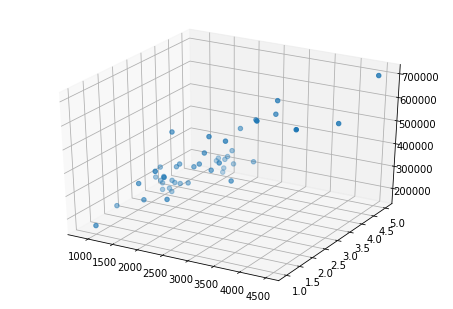

In [13]:
# imporing libraries
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

# visualize our data
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x[:,0], x[:,1], y)
plt.show()

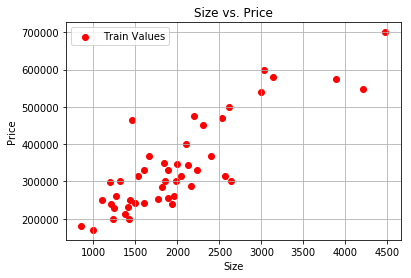

In [14]:
# visualize Size vs. Price
plt.scatter(x[:,0],y, color ='red', label='Train Values')
plt.title('Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

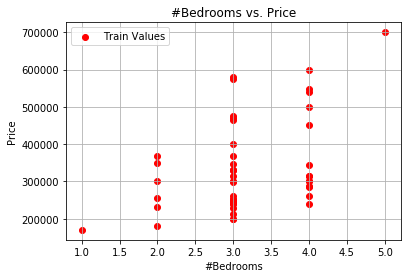

In [15]:
# visualize #Bedrooms vs. Price
plt.scatter(x[:,1],y, color ='red', label='Train Values')
plt.title('#Bedrooms vs. Price')
plt.xlabel('#Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Text(0.5,0.92,'Reduction of cost with theta update')

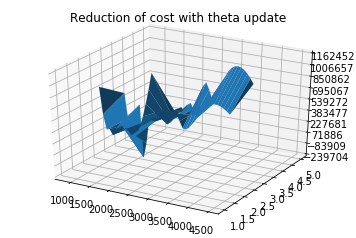

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# copy data
x_vis = x[:,0]
y_vis = x[:,1]
z_vis = y

# create 1D-arrays from the 2D-arrays
x_vis = x_vis.reshape(m)
y_vis = y_vis.reshape(m)
z_vis = z_vis.reshape(m)
xyz = {'x': x_vis, 'y': y_vis, 'z': z_vis}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('Reduction of cost with theta update')